In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(color_codes=True)


In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Exploratory data analysis

<Axes: xlabel='sex', ylabel='count'>

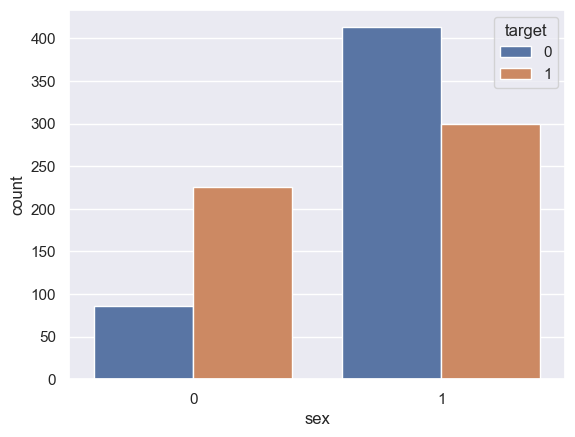

In [5]:
sns.countplot(data=df,x="sex",hue="target")

<Axes: xlabel='age', ylabel='Count'>

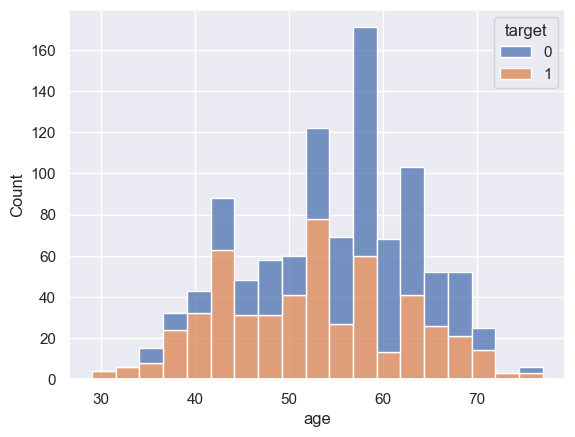

In [6]:
sns.histplot(data=df,x="age",hue="target",multiple="stack")

<Axes: xlabel='chol', ylabel='Count'>

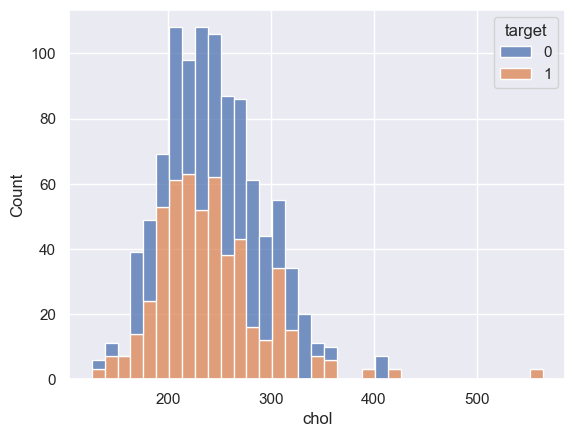

In [8]:
sns.histplot(data=df,x="chol",hue="target",multiple="stack")

<Axes: xlabel='trestbps', ylabel='Count'>

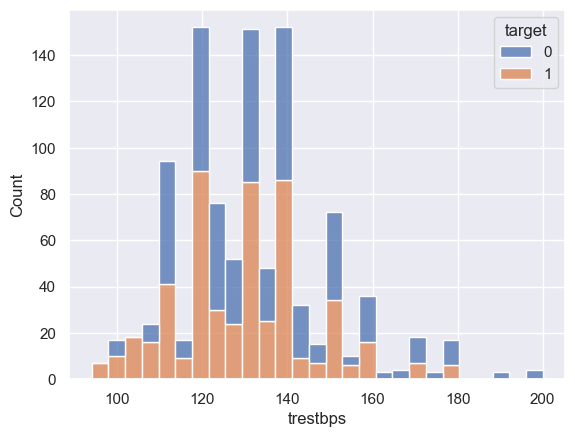

In [9]:
sns.histplot(data=df, x="trestbps", hue="target", multiple="stack")
     


<Axes: xlabel='thalach', ylabel='Count'>

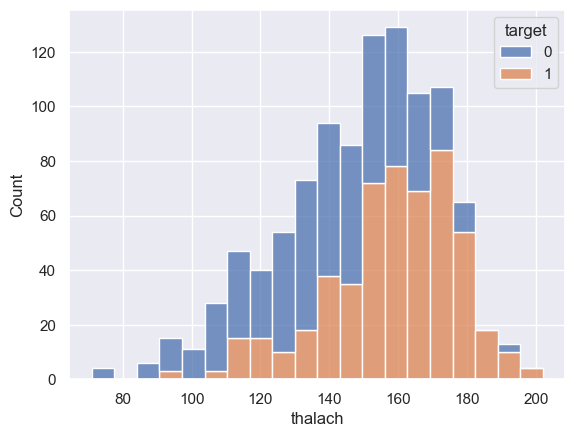

In [10]:
sns.histplot(data=df, x="thalach", hue="target", multiple="stack")
     

Data Preprocessing

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

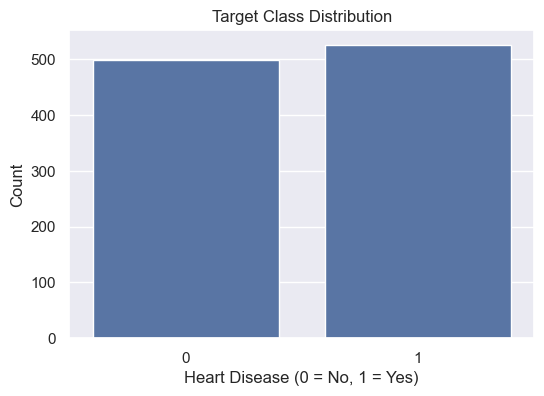

target
1    526
0    499
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print(df['target'].value_counts())


Outlier Detection using Boxplot

<Axes: xlabel='age'>

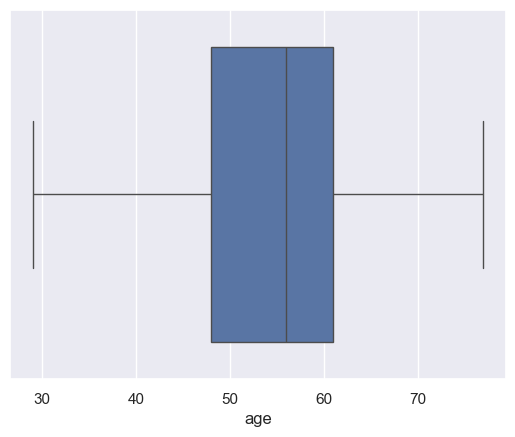

In [15]:
sns.boxplot(x=df["age"])

<Axes: xlabel='trestbps'>

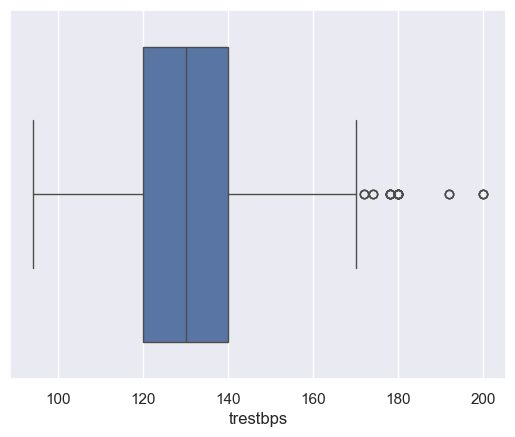

In [17]:
sns.boxplot(x=df["trestbps"])

<Axes: xlabel='chol'>

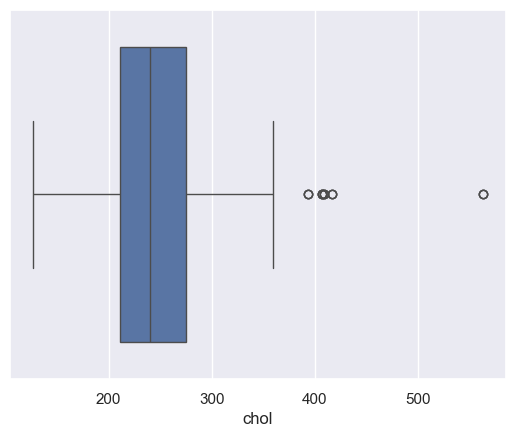

In [18]:
sns.boxplot(x=df["chol"])

<Axes: xlabel='thalach'>

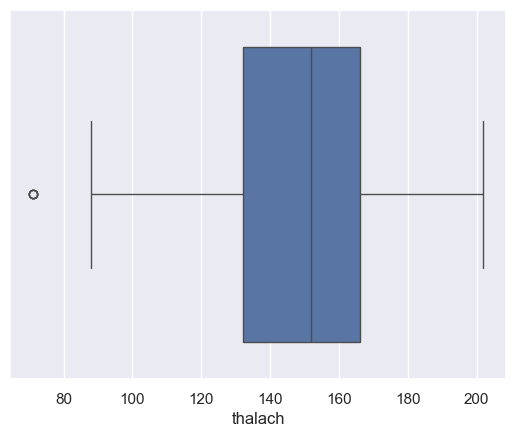

In [19]:
sns.boxplot(x=df["thalach"])

<Axes: xlabel='oldpeak'>

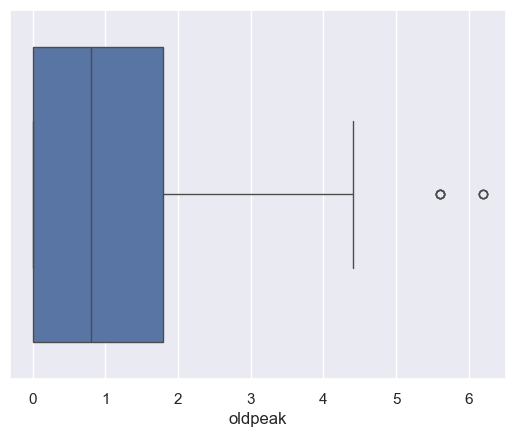

In [20]:
sns.boxplot(x=df["oldpeak"])


Outlier Removal using Z-score

In [21]:
import scipy.stats as stats
z=np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis= 1)]
data_clean.shape

(969, 14)

Data Correlation using Heatmap

<Axes: >

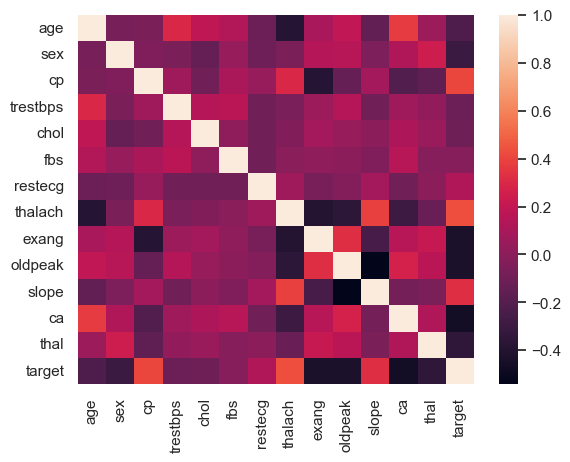

In [22]:
sns.heatmap(data_clean.corr() , fmt =' .2g')

Correlation between Class and other attribute

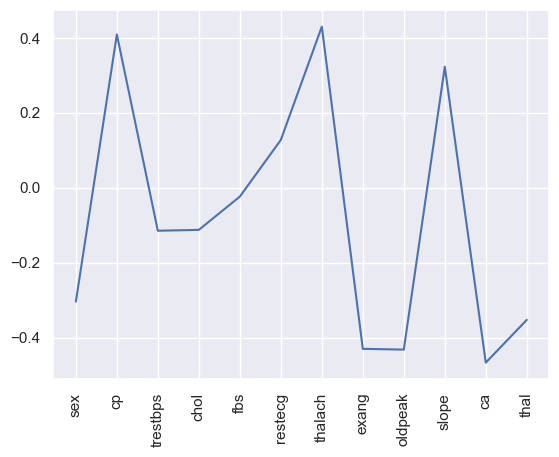

In [23]:
corr = data_clean[data_clean.columns[1:]].corr()['target'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

Machine Learning Model Building

In [24]:

X = data_clean.drop('target', axis=1)
y = data_clean['target']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
     

Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")
     

Accuracy Score : 100.0 %


In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


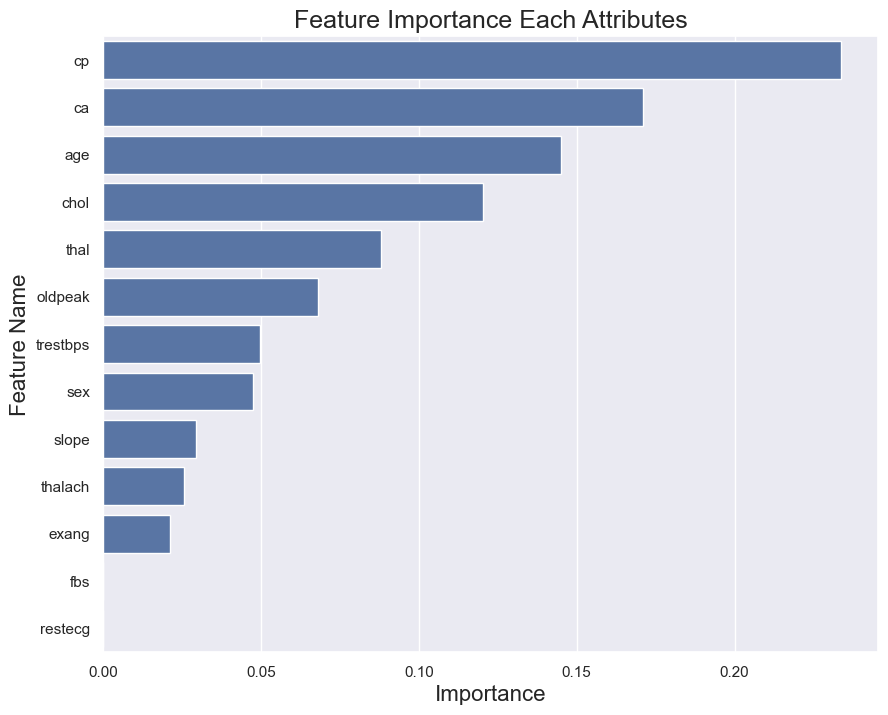

In [29]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()
     

Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 100.0 %


In [32]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


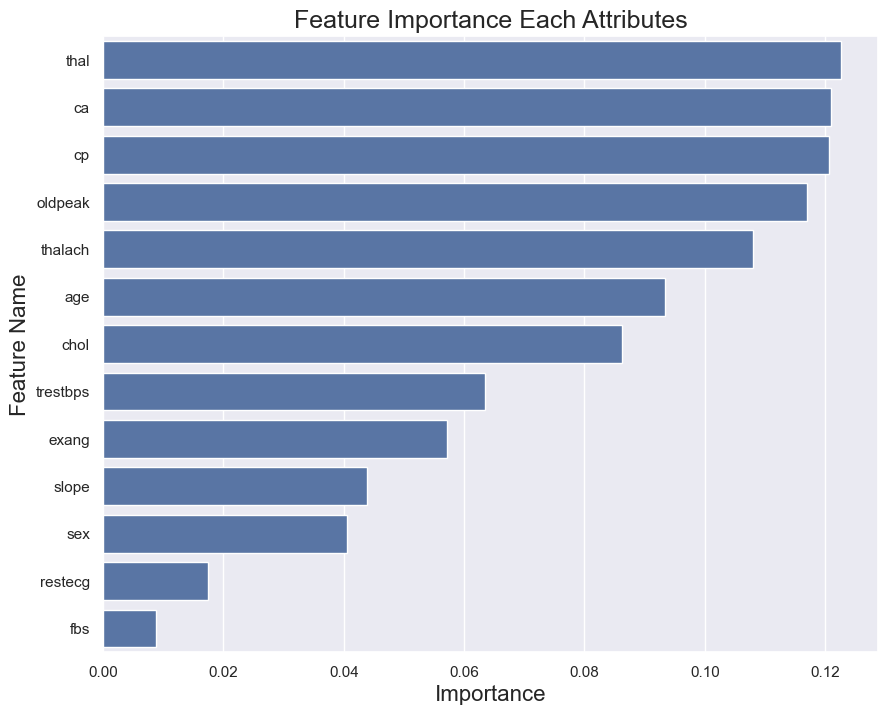

In [33]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

ADABOOST

In [34]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)
     

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,0


In [35]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2)," %")

Accuracy Score : 90.72  %


In [36]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9150943396226415
Precision Score :  0.8899082568807339
Recall Score :  0.941747572815534


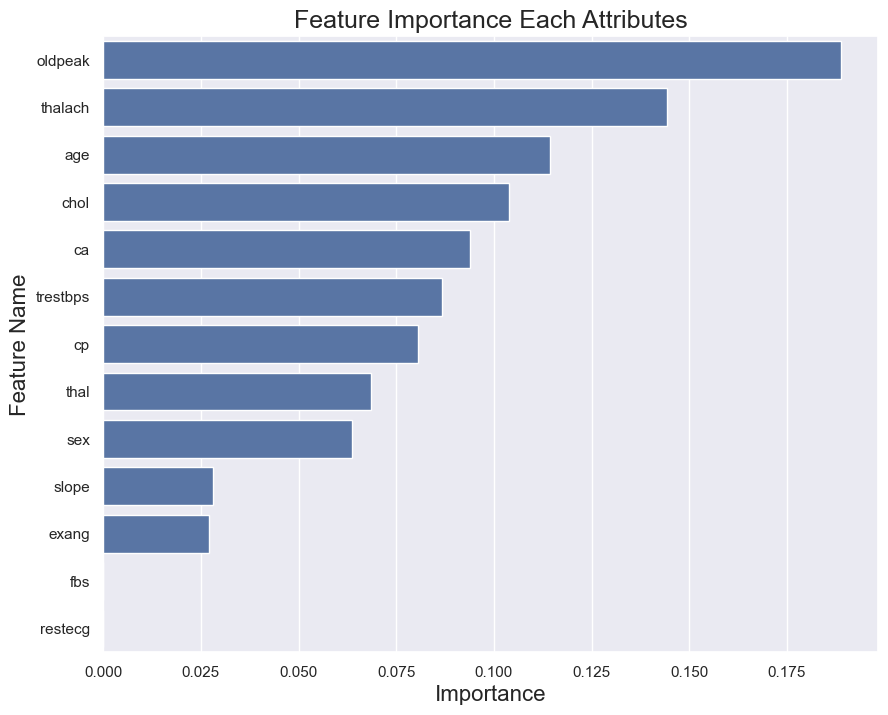

In [37]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()